8th July 2023 21:00PM


## Meta Database Engineer Certification(Coursera): Capstone Project

**The African Jollof Restaurant**

The African Jollof Restaurant is a personalized version of the Little Lemon Restaurant used in the Database Engineering Certification course capstone project. I chose to rename the restaurant as "African Jollof" to make the project more engaging for me.

Business Problem: The African Jollof Restaurant began having lots of guests lately. They seek to be able to cater for all geusts providing a great expereince for them. They therefore seek a way to manage guests visitation and bookings. This is where I come in: *to help African Jollof Restaurant set up a booking system to keep track of which guests are visiting the restaurant and at what times.*

At the end of this project, I proved my ability to 
- Set up a database project
- manage data in a database
- Create sales report and a booking system
- Work with data analytics and visualizations facilitate data driven decisions
- Create a database client

Tools and software used are:
- Git
- MySQL Workbench
- Miro
- Tableau
- Python


I implemented the above across several modules of the project. This is shown below:

In [ ]:
# Module 1: Goal: to help African Jollof Restaurant set up a database project
# tasks
"""
# set up a repository
# set up a MySQL instance server in MySQL Workbench
# Create and implement an ER diagram data model
# Commit the project

"""

# I began by creating a git repository called db-capstone-project
# Then I went on to set up a local repository and pushed a readme.md to the Git repository

git init
echo "creating capstone project" >> readme.md
git add readme.md
git commit -m "added a readme file to the project"
git remote add origin <link>
git remote -v
git push origin master

# Next, I logged into MySQL as root user and added an account granting it right to perform all tasks
# Went on to add a new connection that uses the new account created. Then logged into this connection 
# to begin working with database schemas and SQL queries


# Next, I created an ER diagram data model of the business processes of the African Jollof Reataurant
# The goal is to build a robust relational database system in MySQL in which they can store large 
# amounts of data for various aspects of the business. 
# They then need to easily manage and find this data as required.
# I did this by creating a conceptual and a logical model using Miro design tool, and then 
# the physical model in MySQl using all the details proided by African Jollof Restaurant.
# Then I applied Normalization rules.




9th July 16:00PM

Conceptual Data model showing the business process at a high level that is easy to understand.

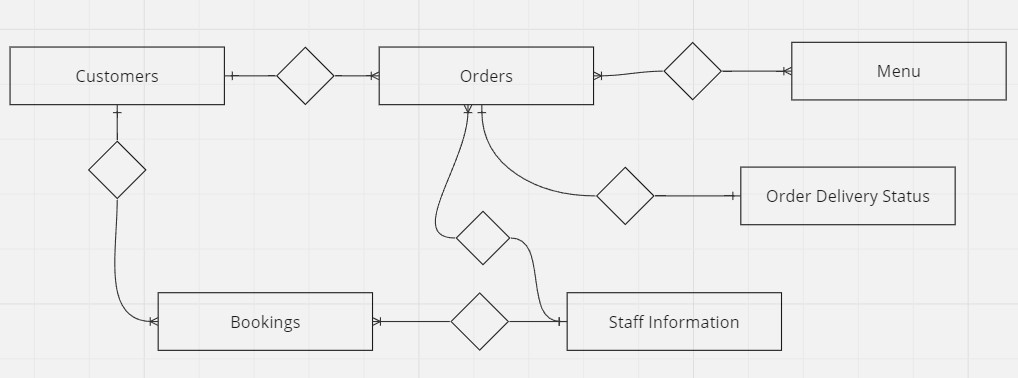


Logical Data model (before normalization) showing the entities and their attributes and the relationship between entites

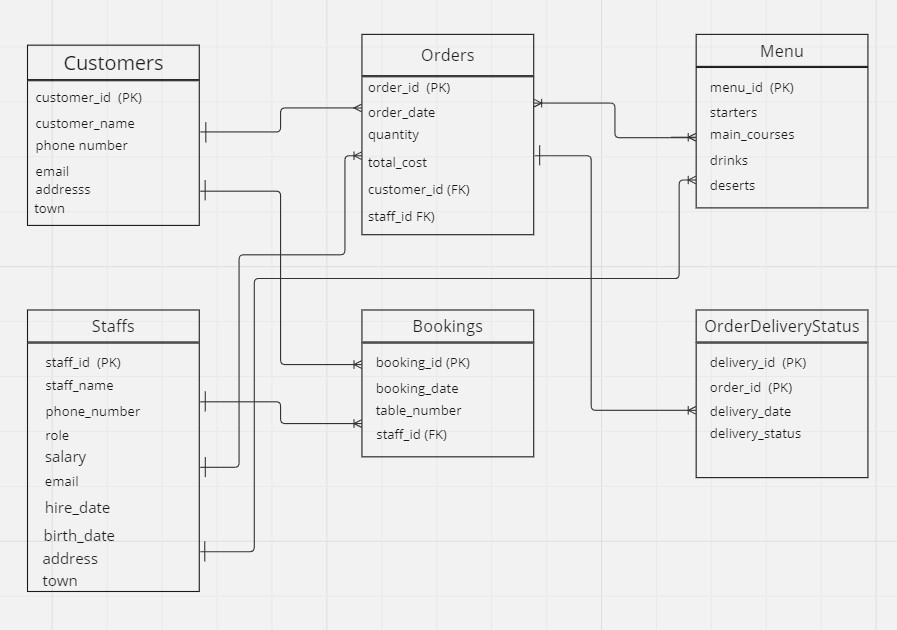


Logical Data model (after normalization) showing normalized tables

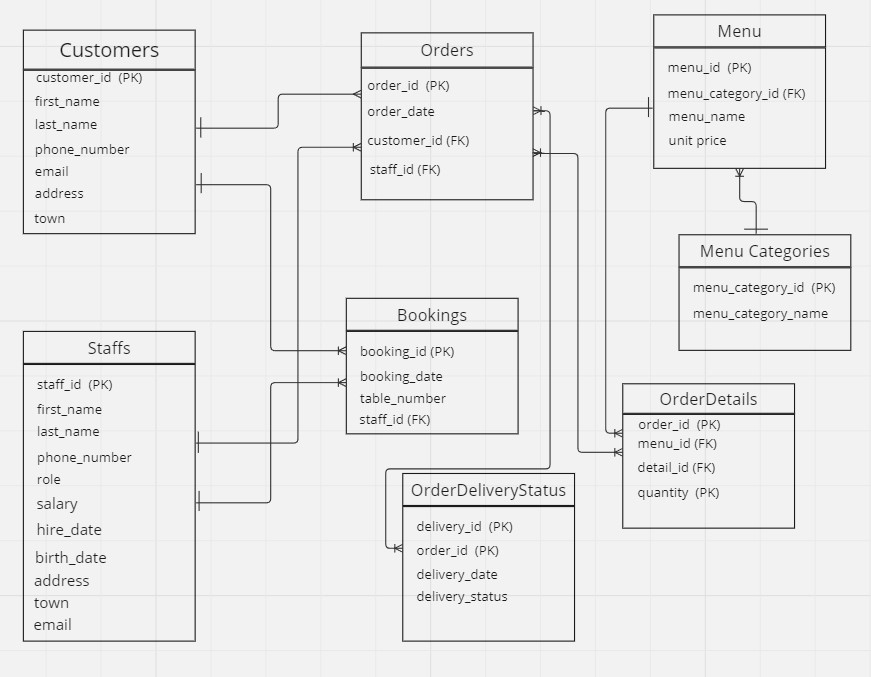


Physical model implemented in MySQL

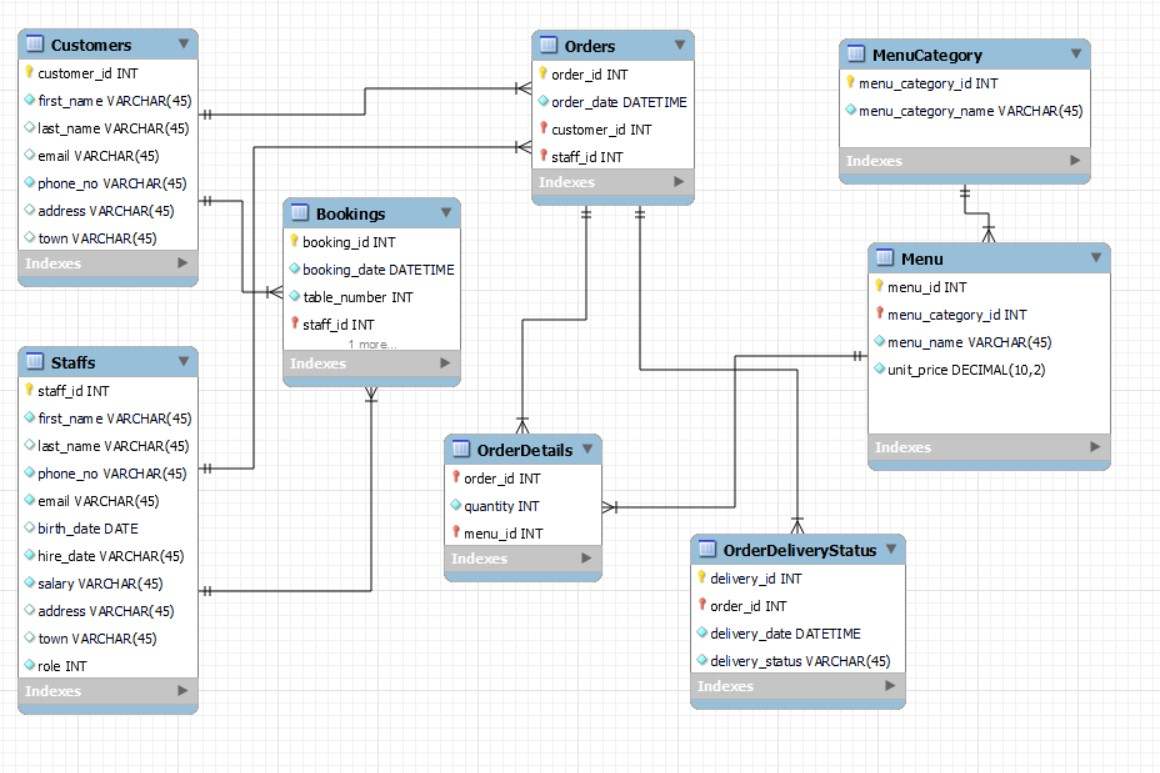


Next, I applied the Forward Engineering option to create the database from the model. I then wrote a query to see the database have been created as shown below.

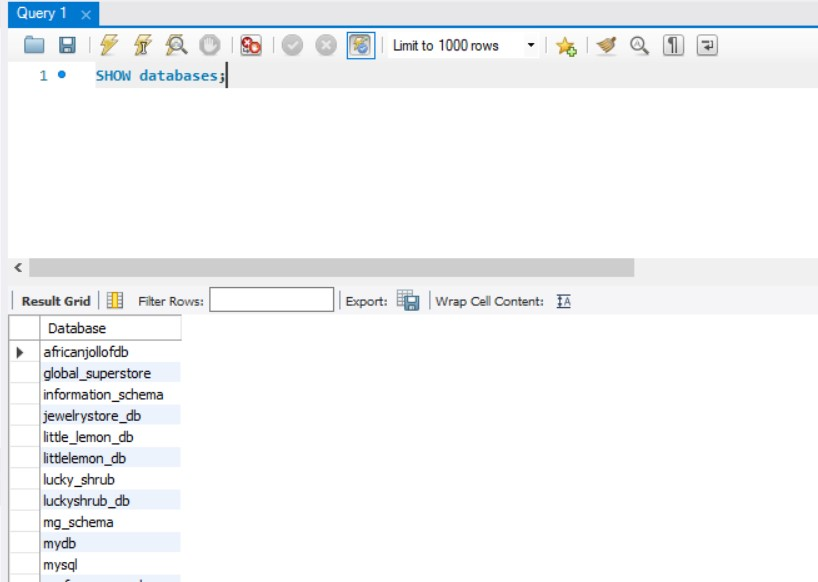

In [ ]:
# Finally, I committed the africanjollofdb folder and script file to GitHub

git checkout -B db_creation
git branch
git status
git add <foldername> <script name>
git commit - m "added the africanjollof db and script file"
git push

# Then compared and pulled changes in GitHub and merged
# Finally ensured that master branch is up to date

git checkout master
git pull

In [ ]:
# 10th July 2023 19:00PM

# Module 2: The goal is to help African Jollof Restaurant manage the data in their database by creating
# virtual tables that runs most often used queries
# create optimized queries to manage and anlyze data using stored procedure ,prepared statements, transactions and triggers

# I began by populating the various tables in the African Jollof Database

# Task 1: Create a virtual table called OrdersView that focuses on orderId, quantity and cost with a quntity greater than 1
# First, I wrote out the select statement and tested it to see it gives the required result. Then I created the view:

CREATE VIEW OrdersView AS 
SELECT 
O.order_id, quantity, menu_name, (quantity*unit_price) AS cost
FROM Orders as O
inner join Orderdetails as OD
On O.order_id = OD.order_id
inner join menu as M
on M.menu_id = OD.menu_id
where quantity > 1;

# Task 2: AfricanJollof Restaurant need information from four tables on all customers with orders that cost more than $100.
# Solution

SELECT 
c.customer_id,
concat(c.first_name, ' ', c.last_name)
email,
phone_no,
address,
town,
o.order_id,
menu_name,
(quantity*unit_price) as cost
FROM customers as c
inner join Orders as o
on c.customer_id = o.customer_id
inner join Orderdetails as OD
on O.order_id = OD.order_id
inner join Menu as M
on M.menu_id = OD.menu_id
where (quantity*unit_price) > 100;



output of task 2:

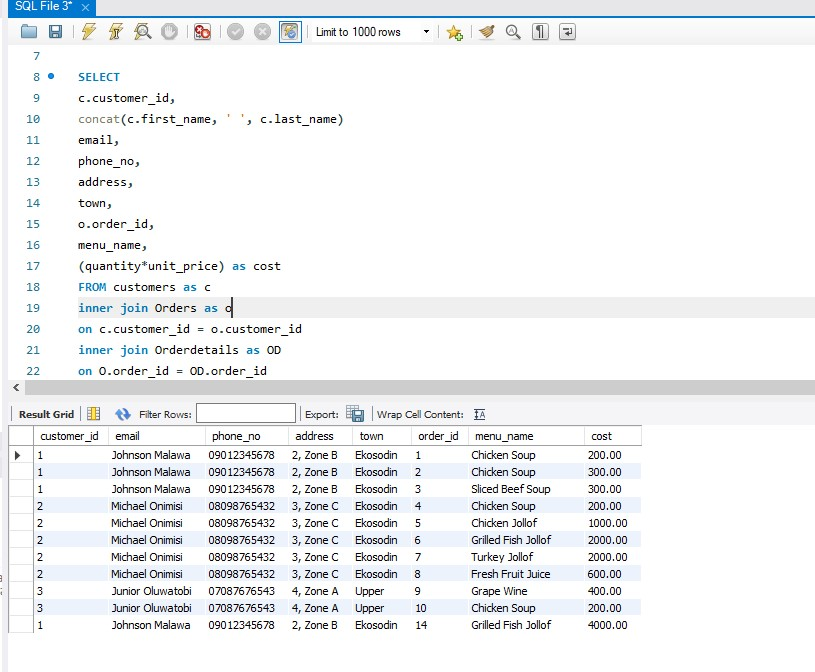

In [ ]:
# Task 3: African Jollof Restaurant need you to find all menu items for which more than 2 orders have been placed.

Solution

select menu_name from menu
where menu_id in 
(
select menu_id from orders as O
inner join orderdetails as OD
on O.order_id = OD.order_id
group by menu_id
having count(menu_id) > 2
);

output of task 3:

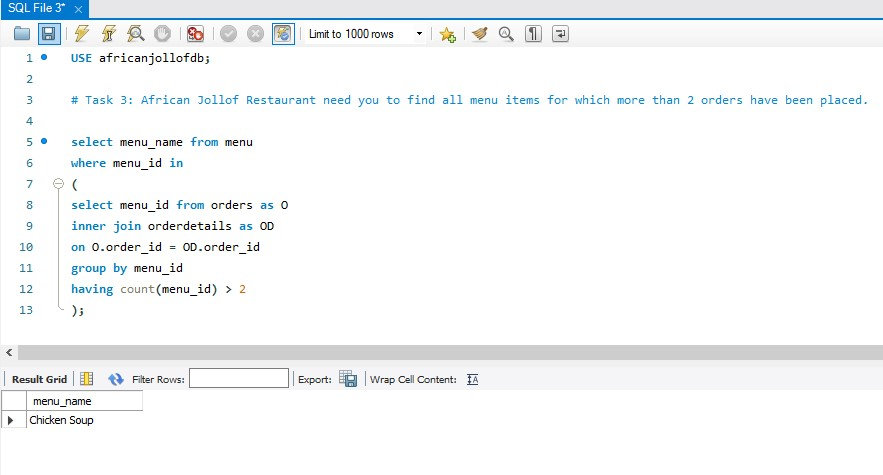


In [ ]:
# July 12th 3:00AM

# Task 4: Create a procedure that displays the maximum ordered quanity in the Orders table.
# This will allow African Jollof Restaurant to reuse the logic implemented in the procedure easily without 
# retyping the same code over gain and again to check the maximun quantity.

Solution: As usual, I began by writing the select query that will form the body of the stored procedure


CREATE PROCEDURE GetMaxQuantity()
Select max(quantity) as 'Max Quantity in Order' from orders as O
inner join orderdetails as OD
on O.order_id = OD.order_id;

Then tested by calling the procedure

Call GetMaxQuantity();

Output of Task 4:

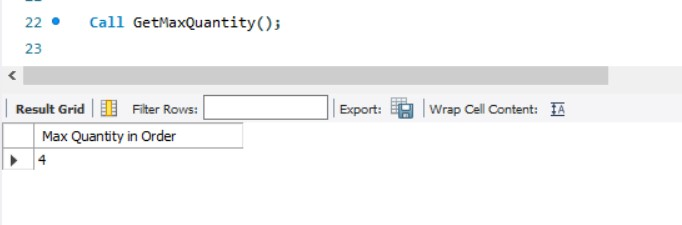


In [ ]:
# Task 5: Help African Jollof Restaurant to create a prepared statement called
# GetOrderDetail. This prepared statement will help to reduce the parsing time of queries.

Solution

PREPARE GetOrderDetail FROM 
' Select customer_id,O.order_id, quantity, (quantity * unit_price) as cost
from orders as O
inner join orderdetails as OD
on O.order_id = OD.order_id
inner join menu as M
on M.menu_id = OD.menu_id
where customer_id = ?
';

Then executed the function:

SET @id = 2;
EXECUTE GetOrderDetail USING @id;

#Task 6: Create stored procedure called CancleOrder

Solution

CREATE PROCEDURE CancleOrder(IN orderID INT)
DELETE FROM Orders
where order_id = orderID;


Call CancleOrder(5);


Task 7: Create SQL queries to check available bookings based on user input


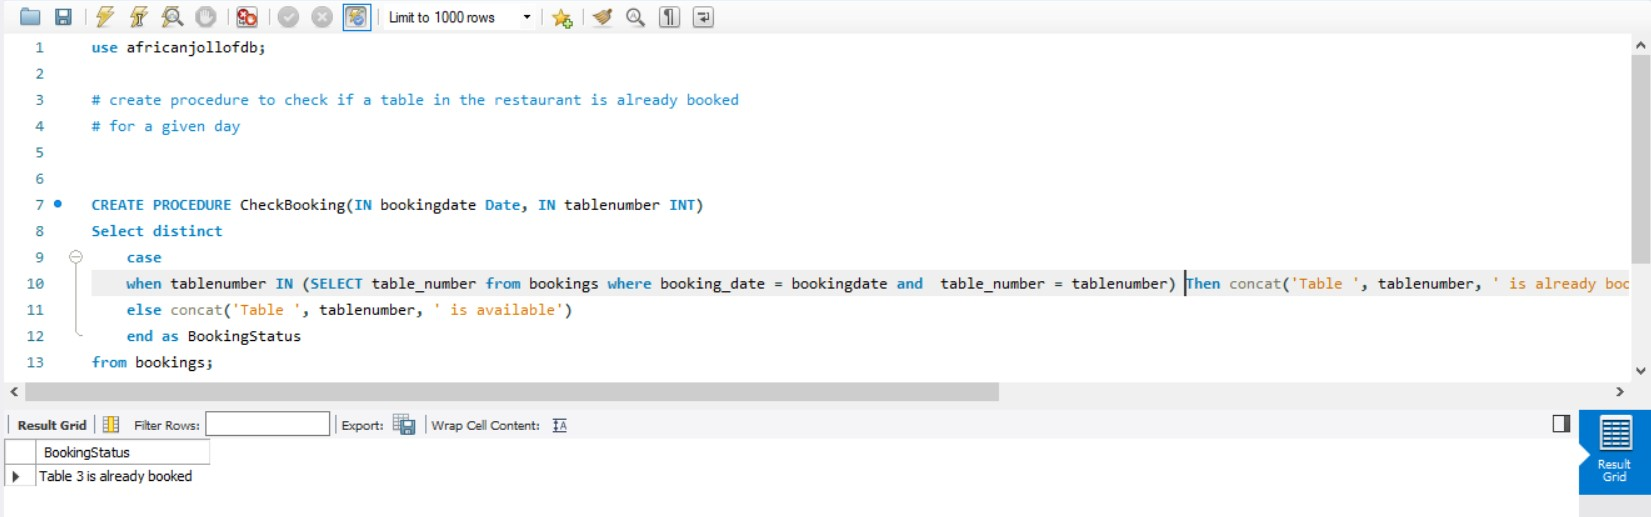


In [ ]:
# 12th July 2023 17:00PM


# Task 8: Verify a booking, and decline any reservations for tables that are already booked under another name. 
# check date and table_name to know if its already booked.

Solution

use africanjollofdb;

DELIMITER //

CREATE PROCEDURE AddValidBooking(IN bookingdate Date, IN tablenumber INT)
BEGIN
START TRANSACTION;
Set  @my_variable = tablenumber;

If (tablenumber <> (SELECT table_number from bookings where booking_date = bookingdate and  table_number = tablenumber)) THEN
      INSERT INTO bookings(booking_date, table_number, customer_id) Values (bookingdate, tablenumber);
      COMMIT;
      Select concat('table ', @my_variable, ' successfully booked.') as 'Booking status';
ELSE 
	ROLLBACK;
    Select concat('table ', @my_variable, ' is already booked - booking cancelled.') as 'Booking status';
END IF;

END //

DELIMITER ;


Output:

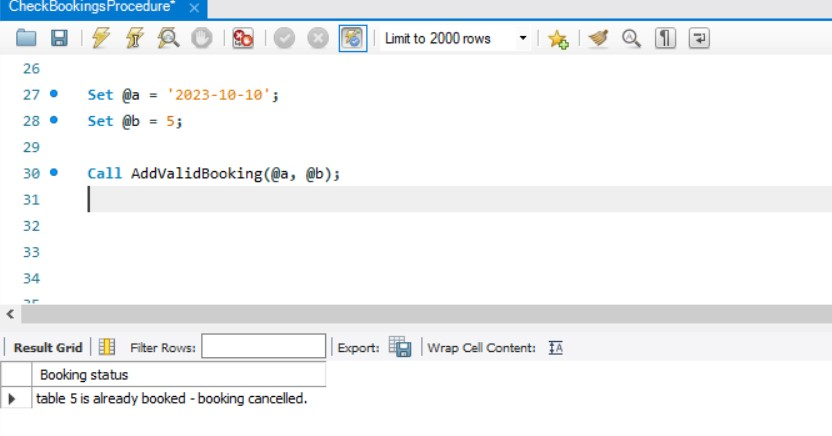

## Create SQL Queries to add and update bookings 

Task 1: create a new procedure called AddBooking to add a new table booking record


Solution

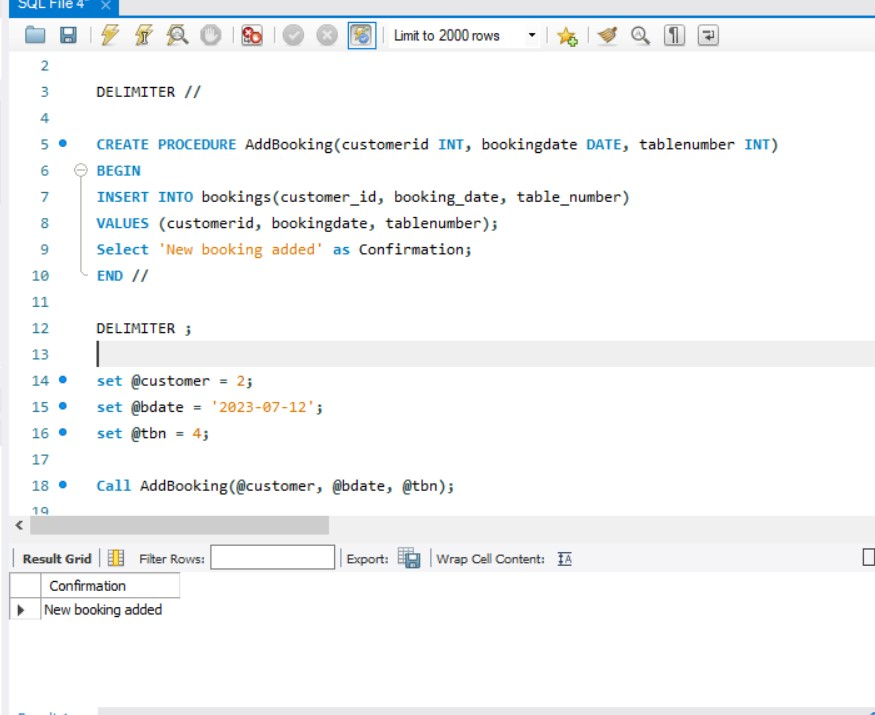


Task 2: create a new procedure called UpdateBooking that African Jollof Restaurant can use to update existing bookings in the booking table.


Solution

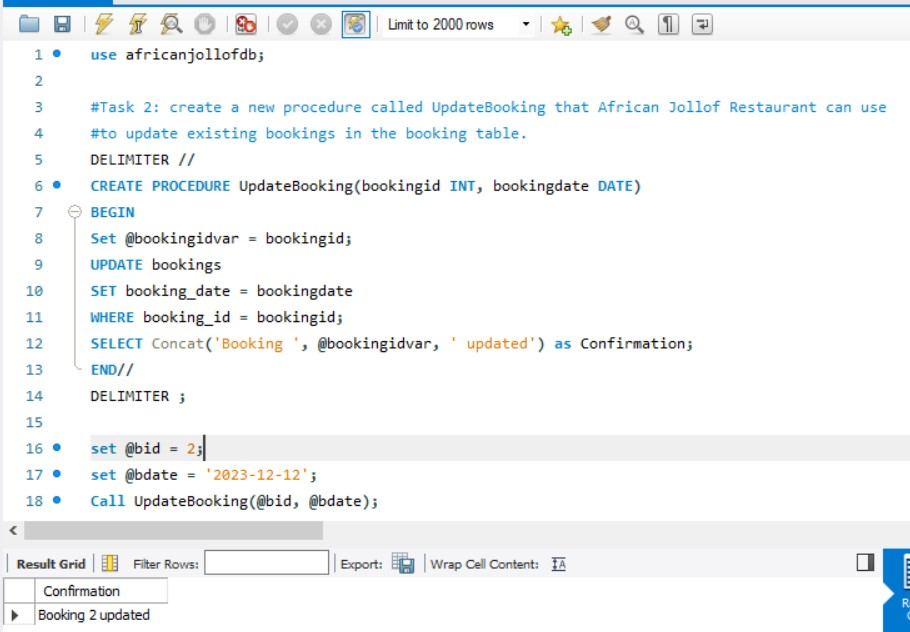


Task 3: create a new procedure called CancelBooking that African Jollof Restaurant can use to cancel or remove a booking

Solution

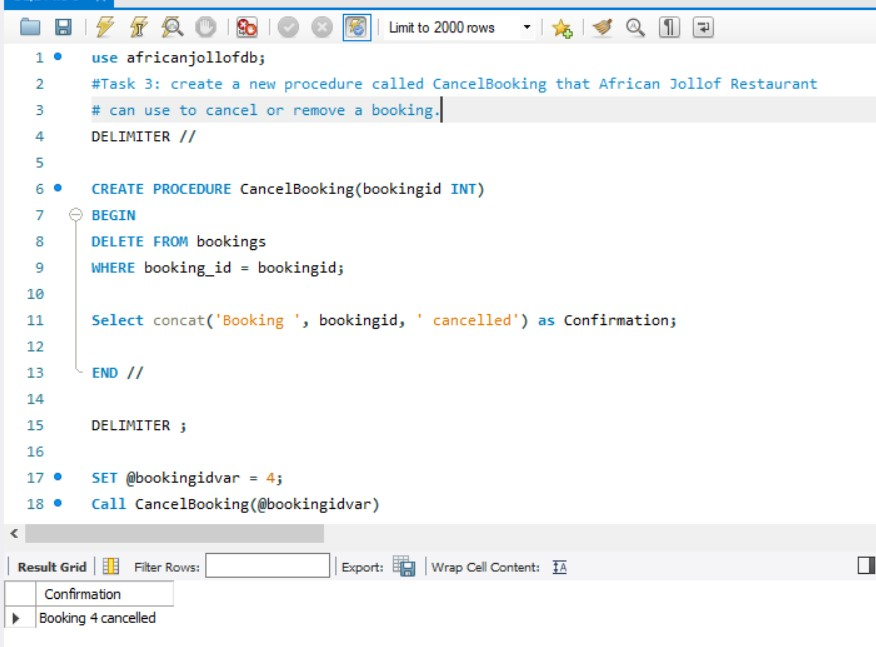
